In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('/.../BostonHousing.csv')

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Information

CRIM: Per capita crime rate by town


ZN: Proportion of residential land zoned for lots over 25,000 sq. ft


INDUS: Proportion of non-retail business acres per town


CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)


NOX: Nitric oxide concentration (parts per 10 million)


RM: Average number of rooms per dwelling


AGE: Proportion of owner-occupied units built prior to 1940


DIS: Weighted distances to five Boston employment centers


RAD: Index of accessibility to radial highways. larger index denotes better accessibility


TAX: Full-value property tax rate per $10,000


B: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town


LSTAT: Percentage of lower status of the population


MEDV: Median value of owner-occupied homes in $1000s

In [29]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


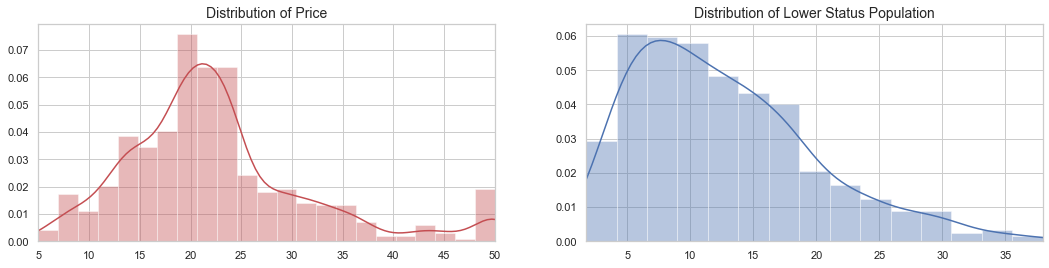

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['medv'].values
time_val = df['lstat'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Price', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Lower Status Population', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

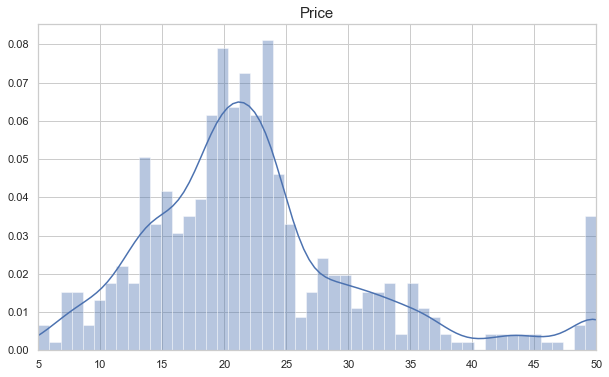

In [26]:
price=df['medv'].values

plt.figure(figsize=(10,6))
ax=sns.distplot(price, bins=50)
ax.set_title('Price', fontsize=15)
ax.set_xlim(min(price),max(price))

plt.show()

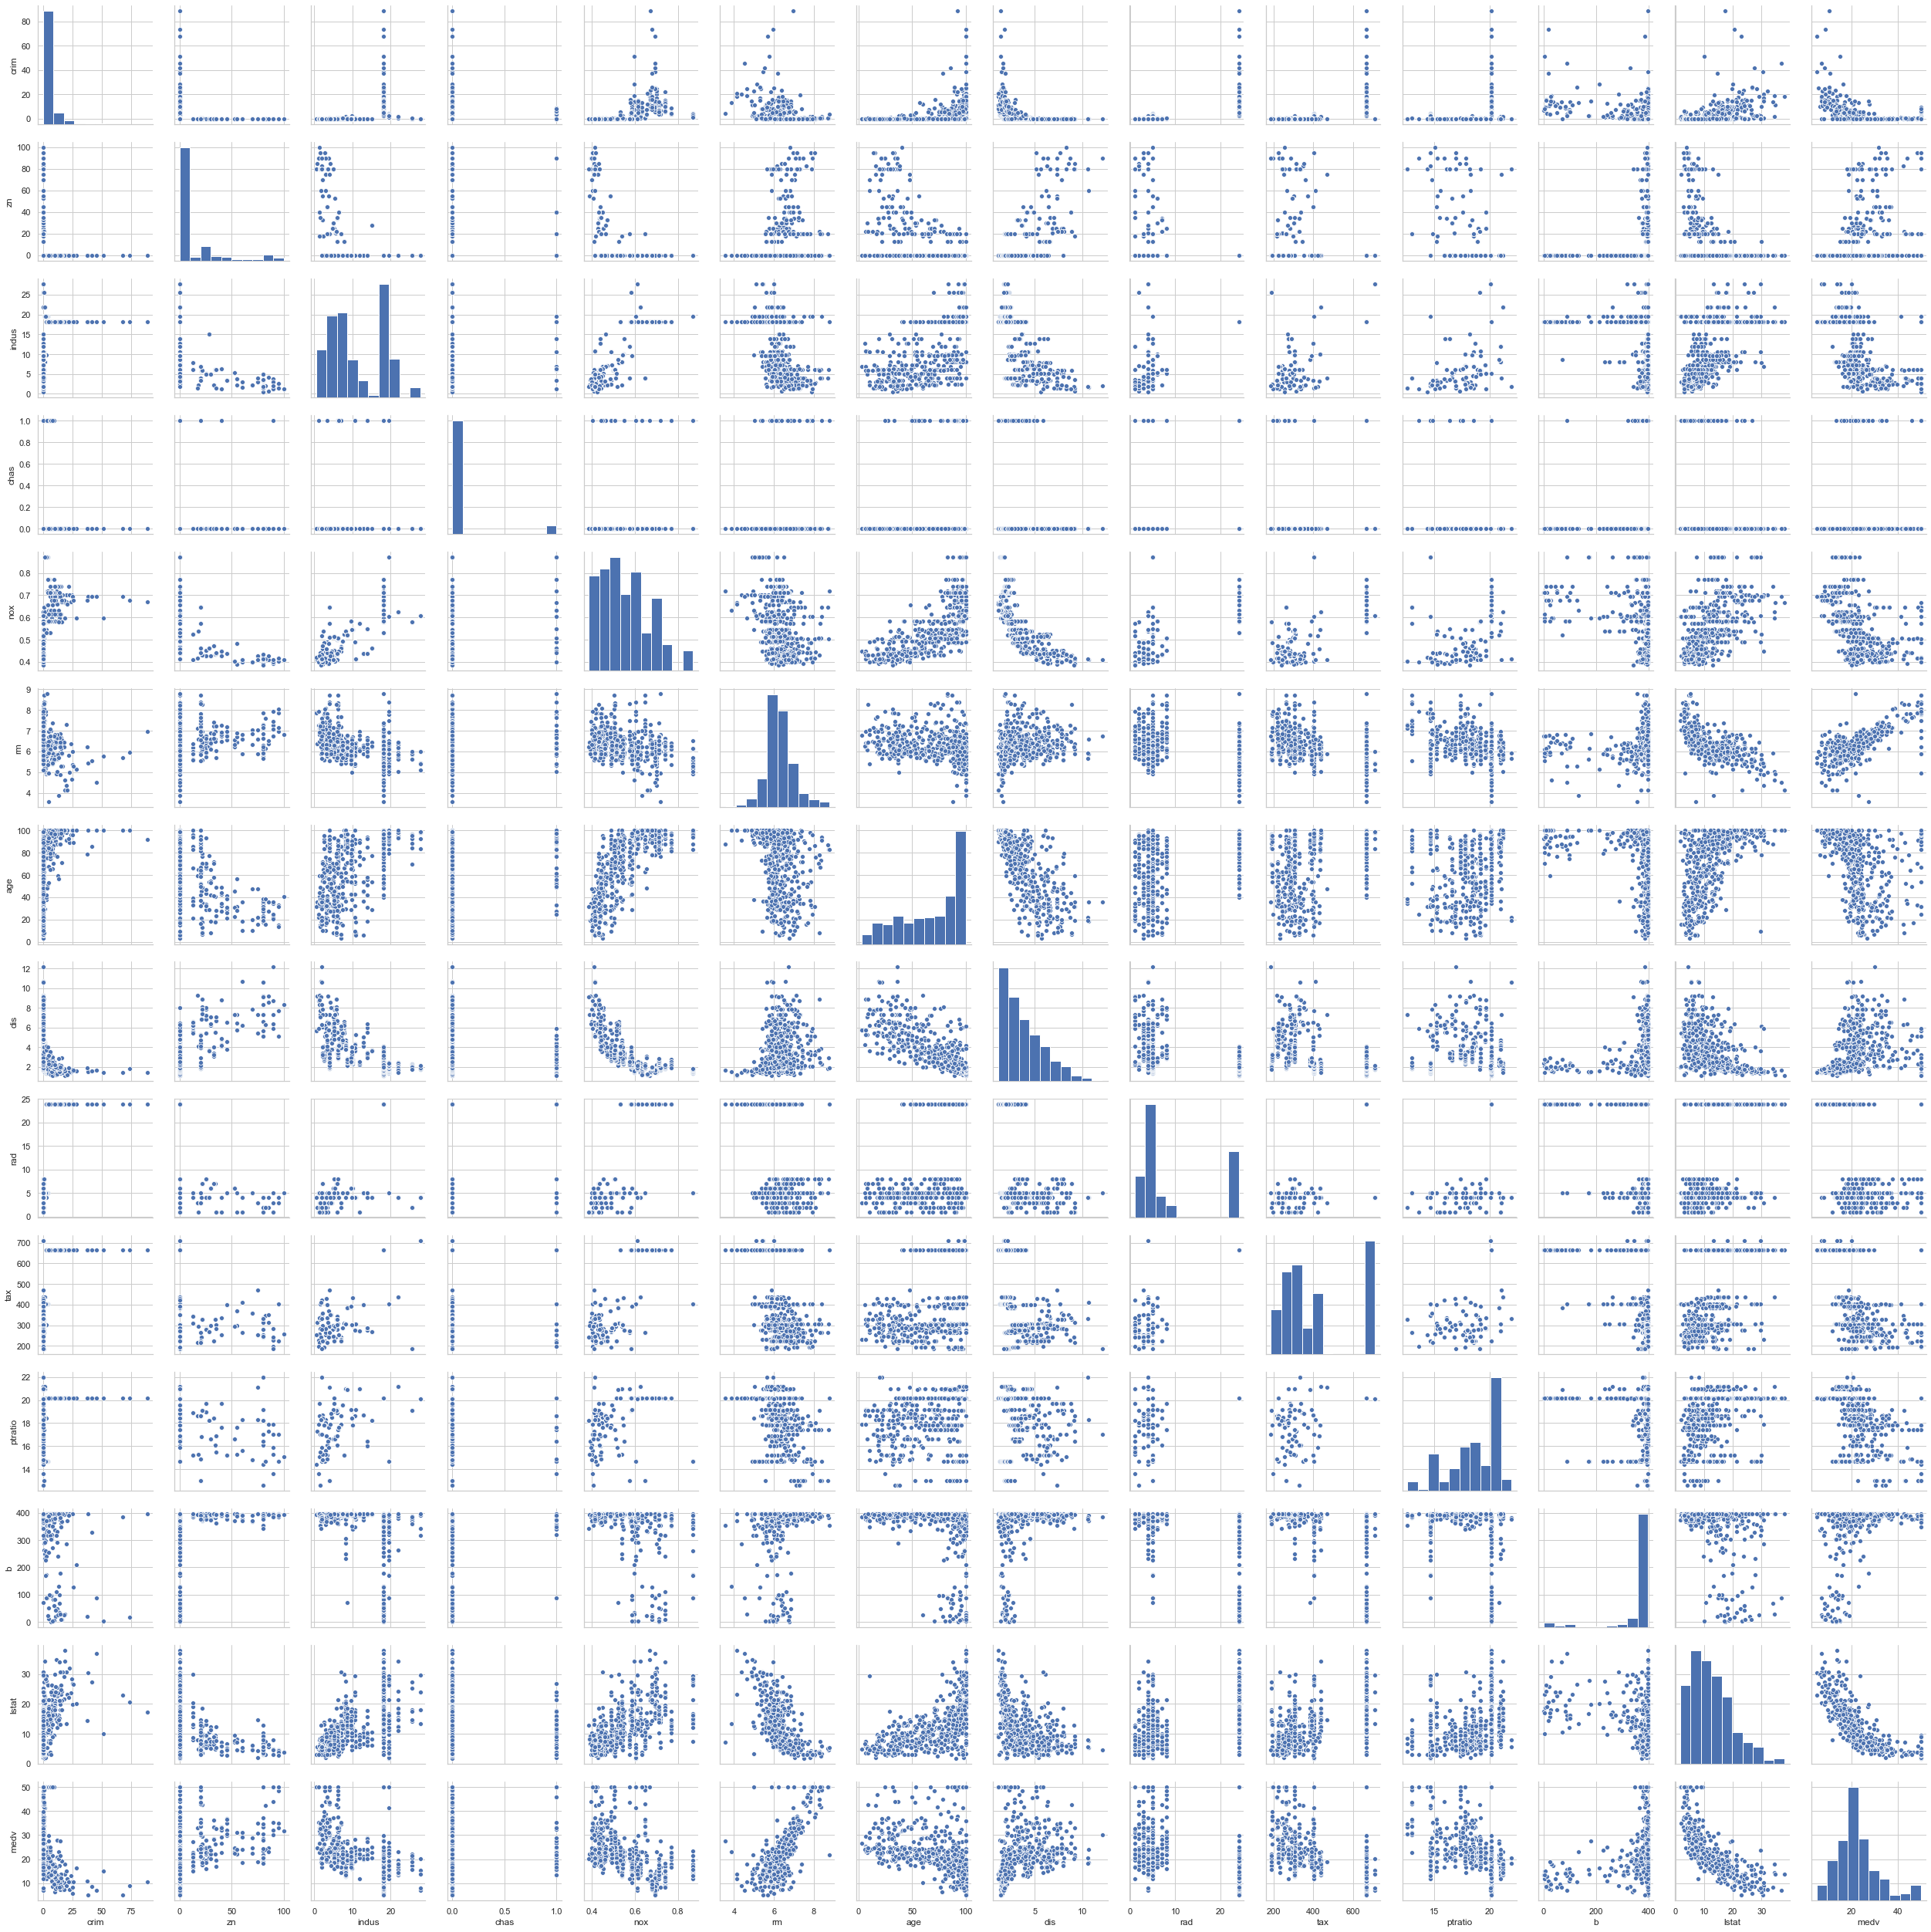

In [27]:
sns.pairplot(df)
plt.show()

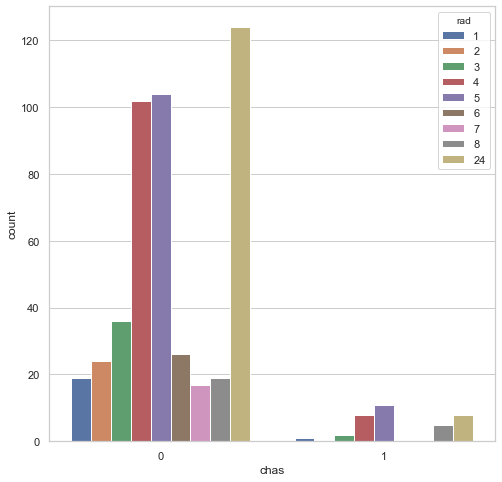

In [36]:
plt.figure(figsize=(8,8))
sns.countplot(x='chas', hue='rad', data=df)

plt.show()

In [65]:
df.corr()['medv'].sort_values()

lstat     -0.737663
ptratio   -0.507787
indus     -0.483725
tax       -0.468536
nox       -0.427321
crim      -0.388305
rad       -0.381626
age       -0.376955
chas       0.175260
dis        0.249929
b          0.333461
zn         0.360445
rm         0.695360
medv       1.000000
Name: medv, dtype: float64

In [66]:
df.corr('kendall')['medv'].sort_values()

lstat     -0.668656
indus     -0.418430
tax       -0.414650
crim      -0.403964
ptratio   -0.398789
nox       -0.394995
age       -0.387758
rad       -0.248115
chas       0.115202
b          0.126955
dis        0.313115
zn         0.339989
rm         0.482829
medv       1.000000
Name: medv, dtype: float64

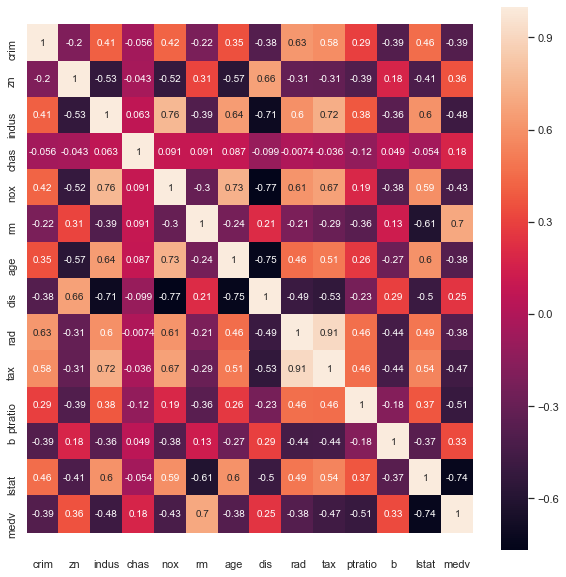

In [46]:
plt.figure(figsize=(10,10))
df_corr = df.corr()
ax = sns.heatmap(df_corr, annot=True, annot_kws={'size':10}) #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

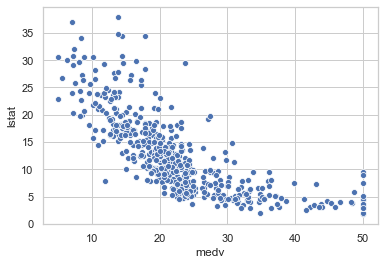

In [47]:
sns.scatterplot(x='medv', y='lstat', data=df)

plt.show()

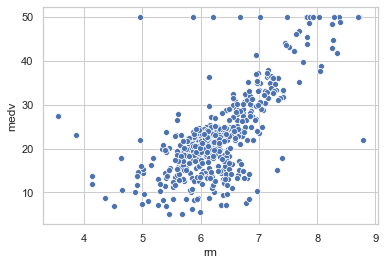

In [69]:
sns.scatterplot(x='rm', y='medv', data=df)

plt.show()

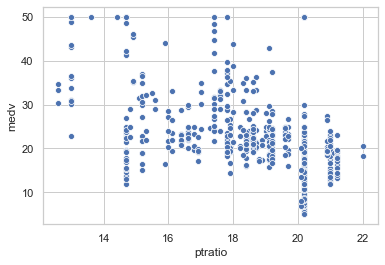

In [70]:
sns.scatterplot(x='ptratio', y='medv', data=df)

plt.show()

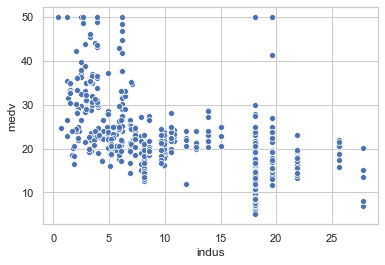

In [72]:
sns.scatterplot(x='indus', y='medv', data=df)

plt.show()

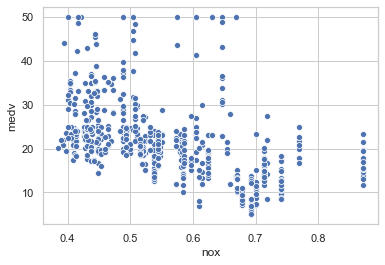

In [74]:
sns.scatterplot(x='nox', y='medv', data=df)

plt.show()

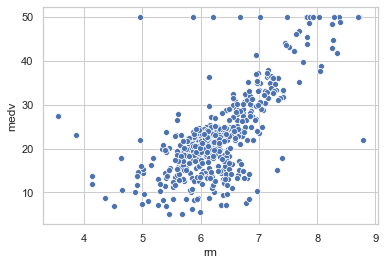

In [76]:
sns.scatterplot(x='rm', y='medv', data=df)

plt.show()

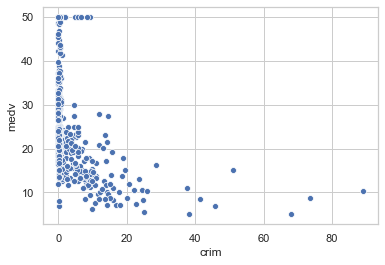

In [78]:
sns.scatterplot(x='crim', y='medv', data=df)

plt.show()

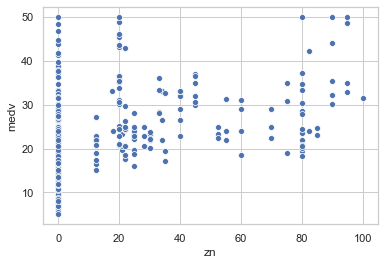

In [79]:
sns.scatterplot(x='zn', y='medv', data=df)

plt.show()

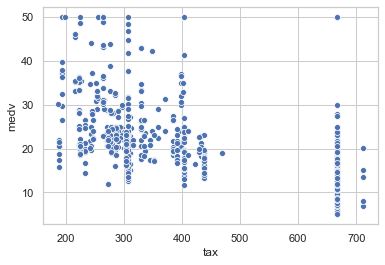

In [80]:
sns.scatterplot(x='tax', y='medv', data=df)

plt.show()

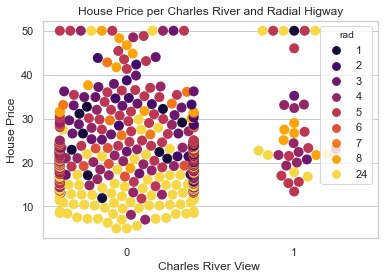

In [67]:

sns.swarmplot(x=df['chas'], y=df['medv'], hue=df['rad'], size=10, palette='inferno')
plt.xlabel('Charles River View ')
plt.ylabel('House Price')
plt.title('House Price per Charles River and Radial Higway')
plt.show()

## Multicollinearity Check

In [52]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get variables for which to compute VIF and add intercept term
A = df.drop('medv', axis=1)
A['Intercept'] = 1 

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = A.columns
vif["VIF"] = [variance_inflation_factor(A.values, i) for i in range(A.shape[1])]

# View results using print
print(round(vif,2))

    variables     VIF
0        crim    1.79
1          zn    2.30
2       indus    3.99
3        chas    1.07
4         nox    4.39
5          rm    1.93
6         age    3.10
7         dis    3.96
8         rad    7.48
9         tax    9.01
10    ptratio    1.80
11          b    1.35
12      lstat    2.94
13  Intercept  585.27


In [53]:
A = df.drop(['medv','tax'], axis=1)
A['Intercept'] = 1 

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = A.columns
vif["VIF"] = [variance_inflation_factor(A.values, i) for i in range(A.shape[1])]

# View results using print
print(round(vif,2))

    variables     VIF
0        crim    1.79
1          zn    2.18
2       indus    3.23
3        chas    1.06
4         nox    4.37
5          rm    1.92
6         age    3.10
7         dis    3.95
8         rad    2.84
9     ptratio    1.79
10          b    1.35
11      lstat    2.94
12  Intercept  578.26


In [54]:
A = df.drop(['medv','tax','nox'], axis=1)
A['Intercept'] = 1 

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = A.columns
vif["VIF"] = [variance_inflation_factor(A.values, i) for i in range(A.shape[1])]

# View results using print
print(round(vif,2))

    variables     VIF
0        crim    1.79
1          zn    2.18
2       indus    2.87
3        chas    1.06
4          rm    1.90
5         age    2.88
6         dis    3.64
7         rad    2.53
8     ptratio    1.60
9           b    1.34
10      lstat    2.93
11  Intercept  397.56


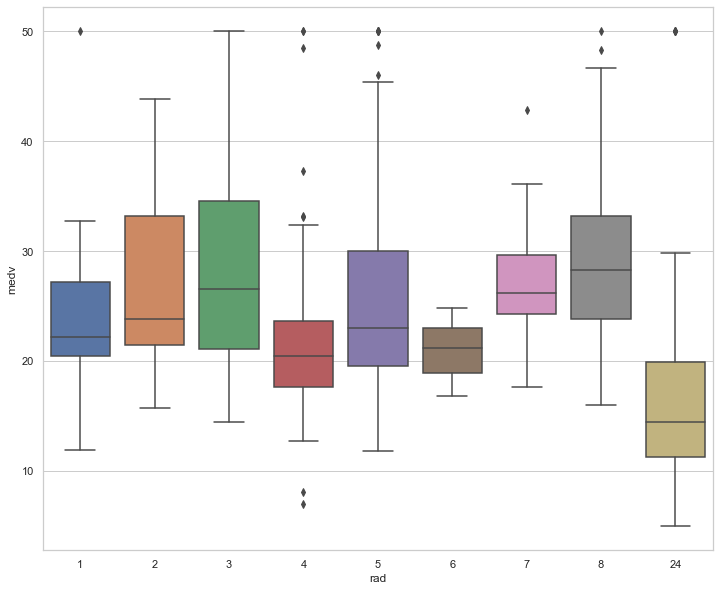

In [84]:
plt.figure(figsize=(12,10))
sns.boxplot(x='rad', y='medv', data=df)

plt.show()

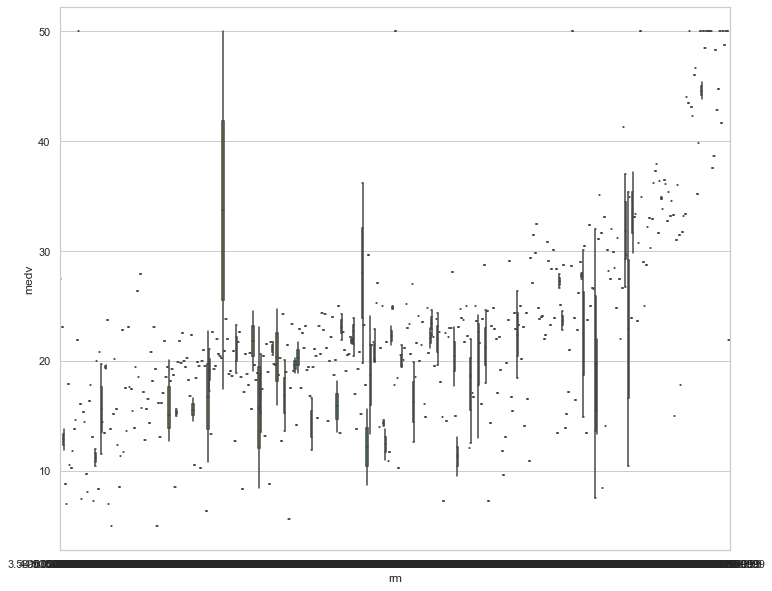

In [85]:
plt.figure(figsize=(12,10))
sns.boxplot(x='rm', y='medv', data=df)

plt.show()

In [86]:
df.sort_values('medv', ascending=False).head(20)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
283,0.01501,90.0,1.21,1,0.4010,7.923,24.8,5.8850,1,198,13.6,395.52,3.16,50.0
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
369,5.66998,0.0,18.10,1,0.6310,6.683,96.8,1.3567,24,666,20.2,375.33,3.73,50.0
370,6.53876,0.0,18.10,1,0.6310,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50.0
371,9.23230,0.0,18.10,0,0.6310,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0
372,8.26725,0.0,18.10,1,0.6680,5.875,89.6,1.1296,24,666,20.2,347.88,8.88,50.0
186,0.05602,0.0,2.46,0,0.4880,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50.0
195,0.01381,80.0,0.46,0,0.4220,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0


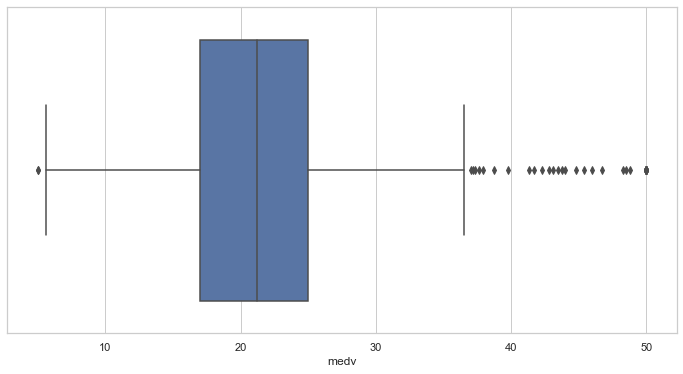

In [88]:
plt.figure(figsize=(12,6))
sns.boxplot(df['medv'])
plt.show()

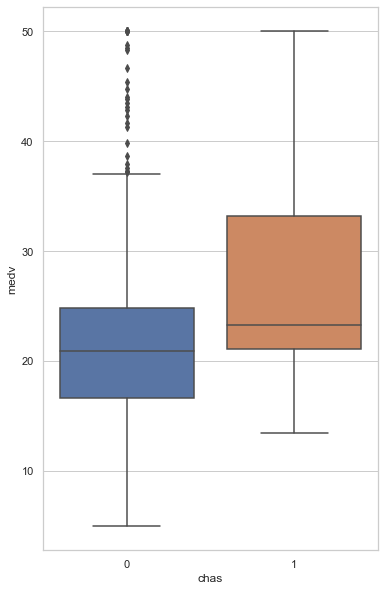

In [93]:
plt.figure(figsize=(6,10))
sns.boxplot(x='chas', y='medv', data=df)
plt.show()

In [96]:
df.groupby('chas')['medv'].describe()

,count,mean,std,min,25%,50%,75%,max
chas,,,,,,,,
0,471.0,22.093843,8.831362,5.0,16.6,20.9,24.80,50.0
1,35.0,28.440000,11.816643,13.4,21.1,23.3,33.15,50.0


In [98]:
df_new=df.drop(['tax','nox'], axis=1)

In [102]:
X=df_new.drop('medv', axis=1).values
y=df_new['medv'].values

# Train and Test Split

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## Scaling

In [160]:
from sklearn.preprocessing import MinMaxScaler

In [161]:
scaler = MinMaxScaler()


In [162]:


# Notice to prevent data leakage from the test set, we only fit our scaler to the training set
scaler.fit(X_train)



MinMaxScaler(copy=True, feature_range=(0, 1))

In [163]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [164]:
X_train.shape

(354, 11)

In [165]:
X_test.shape

(152, 11)

In [166]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [167]:
model=Sequential()

In [168]:
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))


#Output
model.add(Dense(1))

In [169]:
model.compile(optimizer='adam',loss='mse')




In [170]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=300)

Train on 354 samples, validate on 152 samples
Epoch 1/300
354/354 [==============================] - 0s 920us/sample - loss: 556.4967 - val_loss: 662.5524
Epoch 2/300
354/354 [==============================] - 0s 34us/sample - loss: 554.8991 - val_loss: 660.7151
Epoch 3/300
354/354 [==============================] - 0s 43us/sample - loss: 553.0692 - val_loss: 658.6868
Epoch 4/300
354/354 [==============================] - 0s 44us/sample - loss: 551.1224 - val_loss: 656.4837
Epoch 5/300
354/354 [==============================] - 0s 48us/sample - loss: 548.9786 - val_loss: 654.0805
Epoch 6/300
354/354 [==============================] - 0s 39us/sample - loss: 546.5901 - val_loss: 651.4644
Epoch 7/300
354/354 [==============================] - 0s 45us/sample - loss: 544.0536 - val_loss: 648.6215
Epoch 8/300
354/354 [==============================] - 0s 45us/sample - loss: 541.2516 - val_loss: 645.5079
Epoch 9/300
354/354 [==============================] - 0s 44us/sample - loss: 538.2391 - 

Epoch 76/300
354/354 [==============================] - 0s 42us/sample - loss: 78.4819 - val_loss: 105.3127
Epoch 77/300
354/354 [==============================] - 0s 40us/sample - loss: 76.9506 - val_loss: 103.4229
Epoch 78/300
354/354 [==============================] - 0s 39us/sample - loss: 75.2694 - val_loss: 101.4385
Epoch 79/300
354/354 [==============================] - 0s 33us/sample - loss: 73.7062 - val_loss: 99.5102
Epoch 80/300
354/354 [==============================] - 0s 34us/sample - loss: 72.0823 - val_loss: 97.5674
Epoch 81/300
354/354 [==============================] - 0s 40us/sample - loss: 70.5611 - val_loss: 95.6167
Epoch 82/300
354/354 [==============================] - 0s 39us/sample - loss: 69.0115 - val_loss: 93.8015
Epoch 83/300
354/354 [==============================] - 0s 34us/sample - loss: 67.5523 - val_loss: 91.9579
Epoch 84/300
354/354 [==============================] - 0s 37us/sample - loss: 66.0968 - val_loss: 90.2051
Epoch 85/300
354/354 [============

Epoch 152/300
354/354 [==============================] - 0s 65us/sample - loss: 31.0255 - val_loss: 45.8681
Epoch 153/300
354/354 [==============================] - 0s 53us/sample - loss: 30.7767 - val_loss: 45.4757
Epoch 154/300
354/354 [==============================] - 0s 48us/sample - loss: 30.5144 - val_loss: 44.9779
Epoch 155/300
354/354 [==============================] - 0s 50us/sample - loss: 30.2682 - val_loss: 44.4729
Epoch 156/300
354/354 [==============================] - 0s 36us/sample - loss: 29.9973 - val_loss: 44.0839
Epoch 157/300
354/354 [==============================] - 0s 37us/sample - loss: 29.7730 - val_loss: 43.7007
Epoch 158/300
354/354 [==============================] - 0s 39us/sample - loss: 29.5191 - val_loss: 43.3476
Epoch 159/300
354/354 [==============================] - 0s 38us/sample - loss: 29.2997 - val_loss: 43.1086
Epoch 160/300
354/354 [==============================] - 0s 38us/sample - loss: 29.0282 - val_loss: 42.7548
Epoch 161/300
354/354 [=====

Epoch 228/300
354/354 [==============================] - 0s 40us/sample - loss: 19.6542 - val_loss: 27.4125
Epoch 229/300
354/354 [==============================] - 0s 42us/sample - loss: 19.6408 - val_loss: 27.2634
Epoch 230/300
354/354 [==============================] - 0s 40us/sample - loss: 19.6000 - val_loss: 27.1721
Epoch 231/300
354/354 [==============================] - 0s 64us/sample - loss: 19.6021 - val_loss: 27.1986
Epoch 232/300
354/354 [==============================] - 0s 55us/sample - loss: 19.5286 - val_loss: 27.1106
Epoch 233/300
354/354 [==============================] - 0s 53us/sample - loss: 19.5121 - val_loss: 26.9769
Epoch 234/300
354/354 [==============================] - 0s 67us/sample - loss: 19.4735 - val_loss: 26.9196
Epoch 235/300
354/354 [==============================] - 0s 86us/sample - loss: 19.4511 - val_loss: 26.8865
Epoch 236/300
354/354 [==============================] - 0s 51us/sample - loss: 19.4242 - val_loss: 26.8659
Epoch 237/300
354/354 [=====

In [171]:
losses = pd.DataFrame(model.history.history)


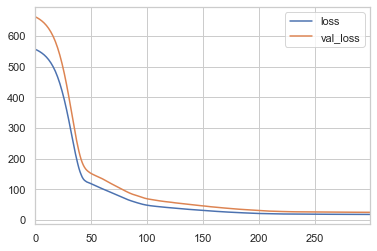

In [172]:
losses.plot()

plt.show()

In [173]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [174]:
predictions=model.predict(X_test)

In [180]:
mean_absolute_error(y_test,predictions)

3.5583741426467896

In [176]:
np.sqrt(mean_squared_error(y_test, predictions))

5.026548920493593

In [177]:
df.medv.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

In [181]:
3.5583741426467896/22.532806

0.1579197079425789

In [179]:
explained_variance_score(y_test,predictions)

0.7473099305275968

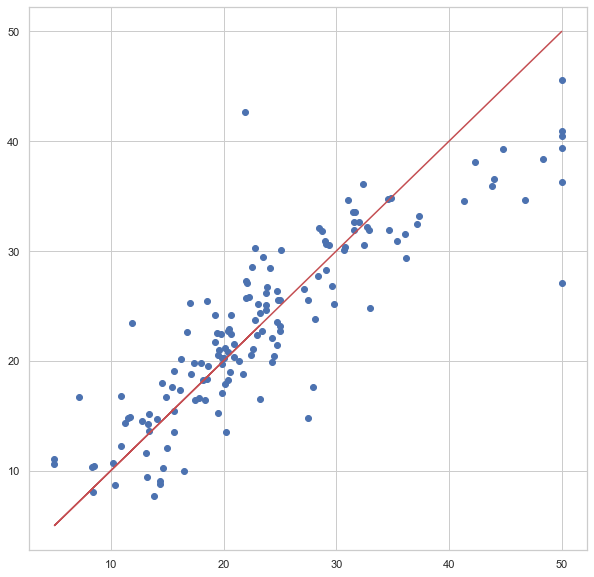

In [182]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test, 'r')
plt.show()

In [215]:
predictions

array([[40.468994 ],
       [29.351877 ],
       [14.8738785],
       [16.67667  ],
       [30.343693 ],
       [31.597092 ],
       [40.90744  ],
       [ 9.4684925],
       [34.592457 ],
       [10.423796 ],
       [29.492126 ],
       [14.291952 ],
       [13.560323 ],
       [19.497334 ],
       [25.434483 ],
       [17.594189 ],
       [ 8.735834 ],
       [32.072277 ],
       [27.755424 ],
       [25.1637   ],
       [14.542722 ],
       [18.815205 ],
       [23.454166 ],
       [26.788948 ],
       [33.189    ],
       [19.67213  ],
       [30.937471 ],
       [19.806505 ],
       [27.132557 ],
       [34.702126 ],
       [19.891724 ],
       [18.24976  ],
       [36.53626  ],
       [45.569725 ],
       [30.08855  ],
       [21.047596 ],
       [14.747058 ],
       [18.017614 ],
       [ 8.063455 ],
       [30.557217 ],
       [22.071619 ],
       [19.003456 ],
       [35.93762  ],
       [14.838904 ],
       [17.036451 ],
       [26.138481 ],
       [31.842964 ],
       [16.63

## Linear Regression

In [216]:
X=X=df_new.drop('medv', axis=1)
y=df_new['medv']

In [217]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [218]:
from sklearn.linear_model import LinearRegression

In [219]:
lm = LinearRegression()

In [220]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [221]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
crim,-0.082122
zn,0.042895
indus,-0.133459
chas,4.191819
rm,3.515369
age,-0.008788
dis,-1.142677
rad,0.053779
ptratio,-0.767434
b,0.006749


In [222]:
preds=lm.predict(X_test)

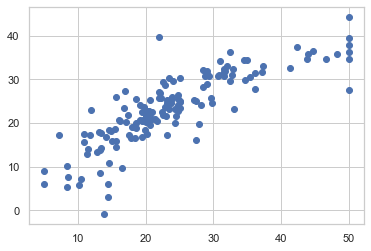

In [223]:
plt.scatter(y_test,preds)
plt.show()

In [225]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 3.8733241385397674
MSE: 30.28274499712978
RMSE: 5.502976012770706


In [226]:
lm.score(X_test,y_test)

0.6949154046794621

In [231]:
lm.score(X_train,y_train)

0.7274729435029211

#  k Nearest Neighbors

In [228]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor(n_neighbors=6)

knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')

In [229]:


pred1 = knn.predict(X_test)

In [230]:
print('MAE:', metrics.mean_absolute_error(y_test, pred1))
print('MSE:', metrics.mean_squared_error(y_test, pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred1)))

MAE: 4.890241228070176
MSE: 52.54379203216374
RMSE: 7.248709680499264


# Support Vector Machine

In [236]:
from sklearn.svm import SVR

In [237]:
model = SVR()

In [238]:
model.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [239]:
pred2 = model.predict(X_test)

In [240]:
print('MAE:', metrics.mean_absolute_error(y_test, pred2))
print('MSE:', metrics.mean_squared_error(y_test, pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred2)))

MAE: 6.291249192405596
MSE: 87.42163726024668
RMSE: 9.34995386407049


## Random Forest 

In [241]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()

dtree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [242]:
pred3 = dtree.predict(X_test)

In [243]:
print('MAE:', metrics.mean_absolute_error(y_test, pred3))
print('MSE:', metrics.mean_squared_error(y_test, pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred3)))

MAE: 3.6105263157894734
MSE: 24.466973684210526
RMSE: 4.946410181556977


## Best model is Deep Learning !!!!